In [1]:
from my_hmf import My_Tinker08
import numpy as np
import matplotlib.pyplot as plt

### Test du changement de redshift

In [2]:
cosmo_params = {
    "H0": 70,
    "Om0": 0.294,
    "Ob0": 0.022 / 0.7**2,
}

n = 0.965

z = 1

In [3]:
mf1 = My_Tinker08(z=z, cosmo_params=cosmo_params)
mf2 = My_Tinker08(z=0, cosmo_params=cosmo_params)

mf2.set_z(z=z)

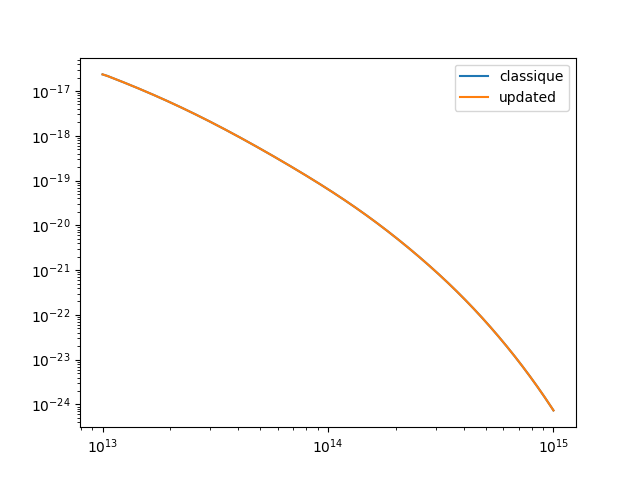

In [7]:
%matplotlib widget
## Test P(k)
plt.figure()
plt.xscale("log")
plt.yscale("log")
plt.plot(mf1.m, mf1.dndm, label="classique")
plt.plot(mf2.m, mf2.dndm, label="updated")
plt.legend()
plt.show()